# Classic and Sequential A/B Testing Analysis

In [1]:
#Importing necessary packages
from __future__ import division

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sms
import scipy.stats as scs

import math

from scipy.stats import norm
from scipy import stats
from ipywidgets import interact
from ipywidgets import interact_manual

#set seaborn style
sns.set(style="darkgrid")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Import the data into a dataframe called data through github link. 
#Set low memory to false because the dataset is large.

url = 'https://raw.githubusercontent.com/mwi-kali/10-Academy/master/AB%20Hypothesis%20Testing%3A%20Ad%20campaign%20performance/data/AdSmartABdata.csv'

data = pd.read_csv(url, low_memory = False)

In [3]:
#remove where there are no reponses
data = data[(data['yes']==1) | (data['no']==1)]

In [4]:
data.head(5)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0
20,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0,1
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0
27,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,1


In [5]:
data.tail(5)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
8059,ffa08ff9-a132-4051-aef5-01a9c79367bc,exposed,2020-07-05,21,Generic Smartphone,6,Chrome Mobile,1,0
8063,ffb176df-ecd2-45d3-b05f-05b173a093a7,exposed,2020-07-04,1,Generic Smartphone,6,Chrome Mobile,1,0
8064,ffb79718-6f25-4896-b6b3-e58b80a6e147,control,2020-07-09,7,Generic Smartphone,6,Chrome Mobile,0,1
8069,ffca1153-c182-4f32-9e90-2a6008417497,control,2020-07-10,16,Generic Smartphone,6,Chrome Mobile,0,1
8071,ffdfdc09-48c7-4bfb-80f8-ec1eb633602b,exposed,2020-07-03,4,Generic Smartphone,6,Chrome Mobile,0,1


In [6]:
data.sample(5)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
556,1134407e-af87-434f-ac7c-299dff13dae2,control,2020-07-04,21,Samsung SM-A705FN,6,Facebook,0,1
2854,5c12c14a-f6b7-42b1-8288-d786e616f73f,control,2020-07-03,15,Samsung SM-A320FL,6,Samsung Internet,1,0
6905,dba2b1a8-cc0c-4e90-941a-fe6c8e0b5bd5,exposed,2020-07-09,2,iPhone,5,Mobile Safari,0,1
5854,b959842f-de5a-43c2-8d15-4b0d5a7914b7,exposed,2020-07-10,2,Generic Smartphone,6,Chrome Mobile,1,0
1768,3aa89a92-a9c2-463b-86a0-8c9f6760e735,exposed,2020-07-04,19,Generic Smartphone,6,Chrome Mobile,1,0


In [7]:
#change date from string
data['date']=pd.to_datetime(data['date'],infer_datetime_format=True)
data = data.sort_values(by = ['date'])

In [8]:
#Generate descriptive statistics
data.describe(include='all')

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
count,1243,1243,1243,1243.000000,1243,1243.000000,1243,1243.000000,1243.000000
unique,1243,2,8,NaN,115,NaN,8,NaN,NaN
top,28cfbbe3-0395-4b24-862a-fdd0f43b8fff,exposed,2020-07-03 00:00:00,NaN,Generic Smartphone,NaN,Chrome Mobile,NaN,NaN
freq,1,657,325,NaN,719,NaN,695,NaN,NaN
first,NaN,NaN,2020-07-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2020-07-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,11.520515,NaN,5.986323,NaN,0.460177,0.539823
std,NaN,NaN,NaN,5.765704,NaN,0.116191,NaN,0.498612,0.498612
min,NaN,NaN,NaN,0.000000,NaN,5.000000,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,7.000000,NaN,6.000000,NaN,0.000000,0.000000


In [9]:
#distinct observations To make sure no repeating 'auction_id'
data.nunique()

auction_id     1243
experiment        2
date              8
hour             24
device_make     115
platform_os       2
browser           8
yes               2
no                2
dtype: int64

## Data Exploration

In [10]:
summary = data.pivot_table(values='yes', index='experiment', aggfunc=np.sum)
# add additional columns to the pivot table

# adding the total number of people
summary['total'] = data.pivot_table(values='yes', index='experiment', aggfunc=lambda x: len(x))

# adding the rate of conversion
summary['rate'] = data.pivot_table(values='yes', index='experiment')
summary['rate'] = summary['rate'].apply(lambda x: x*100)
summary

,yes,total,rate
experiment,,,
control,264,586,45.051195
exposed,308,657,46.879756


compare the two groups by plotting the distribution of the control group and calculating the probability of getting the result from our test group.
distribution for our control group is binomial because the data is a series of Bernoulli trials, where each trial only has two possible outcomes

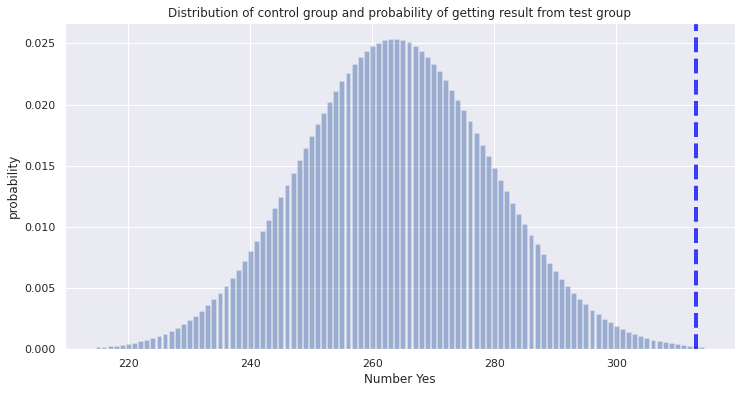

In [11]:
fig, ax = plt.subplots(figsize=(12,6))
plt.style.use('fivethirtyeight')

control_converted = 264
control_total = 4071
control_cr = 0.06484
exposed_cr = 0.07688

x = np.linspace(control_converted-49, control_converted+50, 100)
y = scs.binom(control_total, control_cr).pmf(x)
ax.bar(x, y, alpha=0.5)
ax.axvline(x=exposed_cr * control_total, c='blue', alpha=0.75, linestyle='--')

plt.title('Distribution of control group and probability of getting result from test group', fontsize = 12)
plt.xlabel('Number Yes')
plt.ylabel('probability')
plt.show()

#### Count unique values of categorical variables.

In [12]:
@interact
def check(column = data.columns):
    return data[column].value_counts()

interactive(children=(Dropdown(description='column', options=('auction_id', 'experiment', 'date', 'hour', 'dev…

In [13]:
pd.value_counts(data.experiment)

exposed    657
control    586
Name: experiment, dtype: int64

In [14]:
pd.value_counts(data.device_make)

Generic Smartphone       719
Samsung SM-G960F          45
Samsung SM-G950F          35
Samsung SM-G973F          22
iPhone                    18
                        ... 
SNE-LX1                    1
OnePlus ONEPLUS A3000      1
Samsung SM-J330G           1
STF-L09                    1
XiaoMi Redmi 6A            1
Name: device_make, Length: 115, dtype: int64

In [15]:
pd.value_counts(data.platform_os)

6    1226
5      17
Name: platform_os, dtype: int64

In [16]:
pd.value_counts(data.browser)

Chrome Mobile                 695
Chrome Mobile WebView         227
Facebook                      156
Samsung Internet              145
Mobile Safari                  14
Mobile Safari UI/WKWebView      3
Chrome                          2
Chrome Mobile iOS               1
Name: browser, dtype: int64

#### Countplots

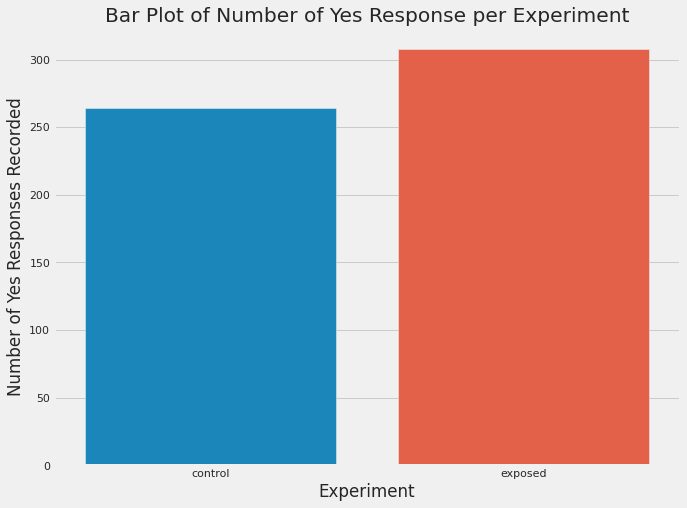

In [17]:
f, ax = plt.subplots(figsize=(10,7.5))
sns.barplot(x=summary.index, y="yes",data=summary,ci=False)
ax.set_title('Bar Plot of Number of Yes Response per Experiment')
ax.set_xlabel('Experiment')
ax.set_ylabel('Number of Yes Responses Recorded')
plt.xticks(rotation=0)
plt.show()

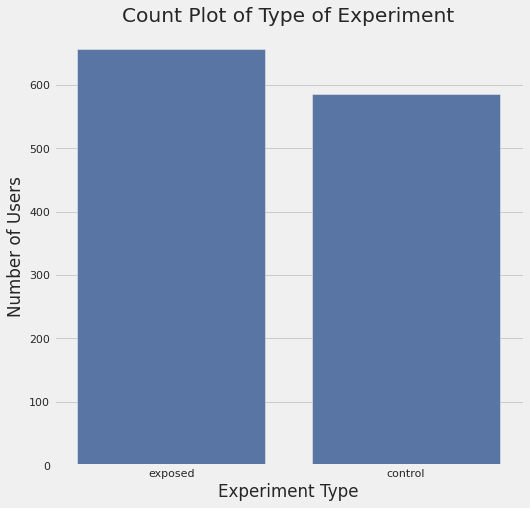

In [18]:
f, ax = plt.subplots(figsize=(7.5,7.5))
sns.countplot(x = 'experiment',color="b",data=data)
ax.set_title('Count Plot of Type of Experiment')
ax.set_xlabel('Experiment Type')
ax.set_ylabel('Number of Users')
plt.show()

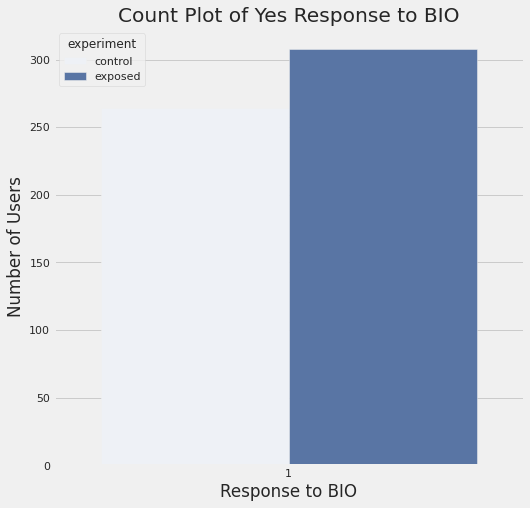

In [19]:
f, ax = plt.subplots(figsize=(7.5,7.5))
sns.countplot(x = 'yes',hue = 'experiment',color="b",data=data[data['yes']==1])
ax.set_title('Count Plot of Yes Response to BIO')
ax.set_xlabel('Response to BIO')
ax.set_ylabel('Number of Users')
plt.show()

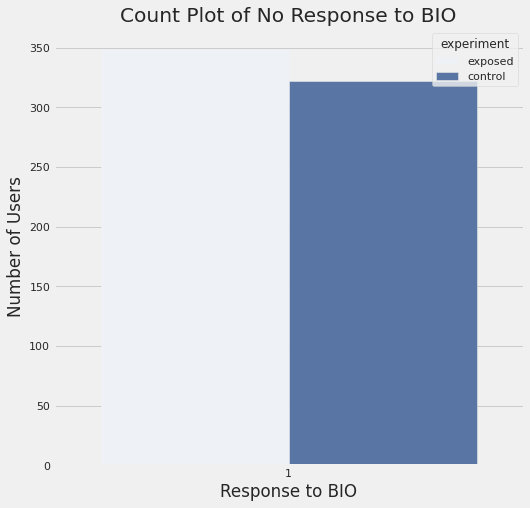

In [20]:
f, ax = plt.subplots(figsize=(7.5,7.5))
sns.countplot(x = 'no',hue = 'experiment',color="b",data=data[data['no']==1])
ax.set_title('Count Plot of No Response to BIO')
ax.set_xlabel('Response to BIO')
ax.set_ylabel('Number of Users')
plt.show()

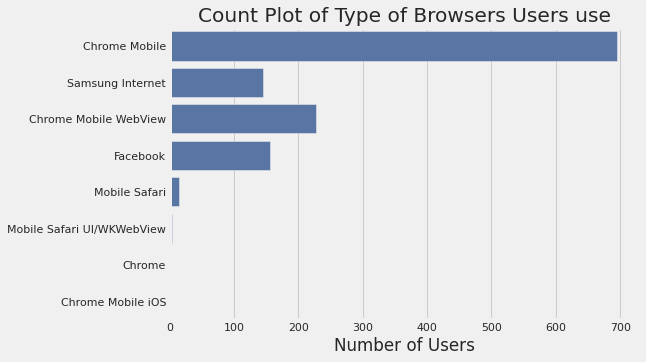

In [21]:
f, ax = plt.subplots(figsize=(7.5,5))
sns.countplot(y = 'browser',color="b",data=data)
ax.set_title('Count Plot of Type of Browsers Users use')
ax.set_xlabel('Number of Users')
ax.set_ylabel(None)
plt.show()

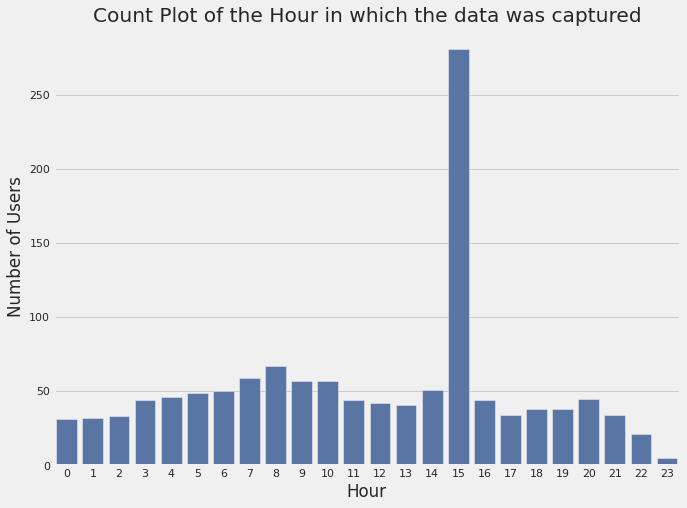

In [22]:
f, ax = plt.subplots(figsize=(10,7.5))
sns.countplot(x = 'hour',color="b",data=data)
ax.set_title('Count Plot of the Hour in which the data was captured')
ax.set_xlabel('Hour')
ax.set_ylabel('Number of Users')
plt.show()

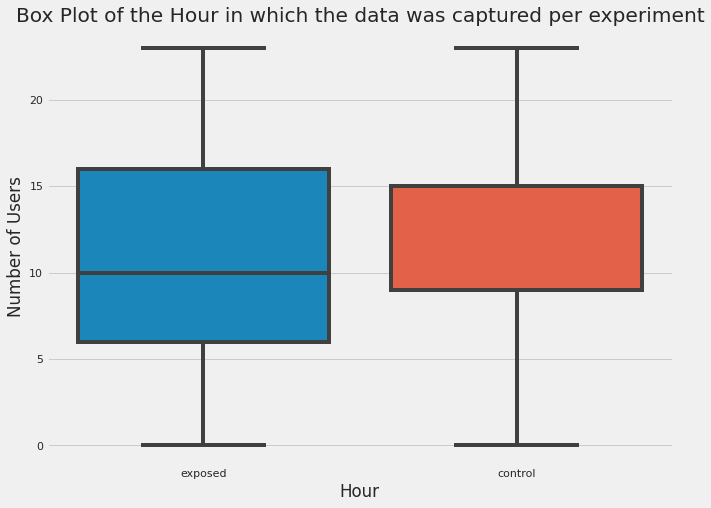

In [23]:
f, ax = plt.subplots(figsize=(10,7.5))
sns.boxplot(data['experiment'], data['hour'])
ax.set_title('Box Plot of the Hour in which the data was captured per experiment')
ax.set_xlabel('Hour')
ax.set_ylabel('Number of Users')
plt.show()


#### Histograms

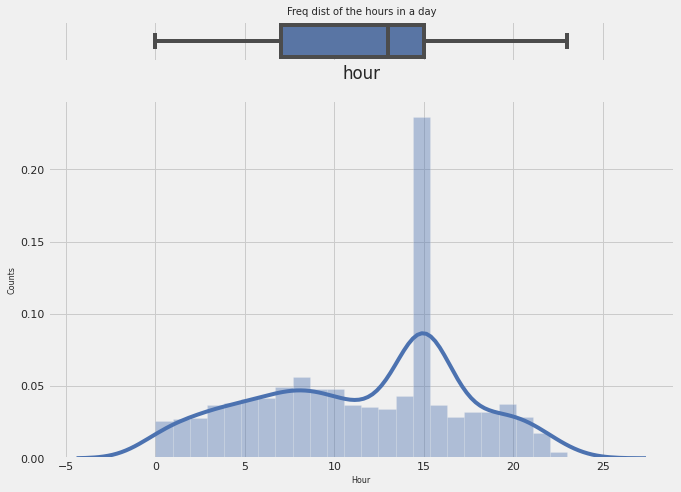

In [24]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True,figsize=(10,7.5), gridspec_kw={"height_ratios": (.1, .9)})
sns.boxplot(data['hour'], ax=ax_box,color="b")
sns.distplot(data['hour'], ax=ax_hist,bins=24,color="b")
ax_box.set_title('Freq dist of the hours in a day', fontsize=10)
ax_hist.set_xlabel('Hour' , fontsize=8)
ax_hist.set_ylabel('Counts', fontsize=8)
plt.show()

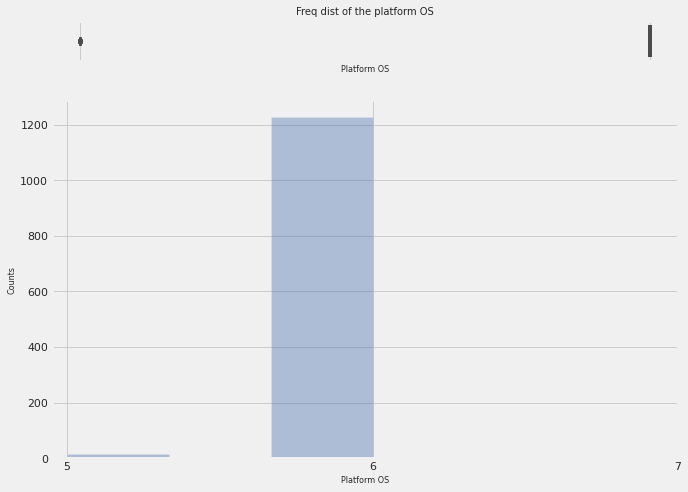

In [25]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True,figsize=(10,7.5), gridspec_kw={"height_ratios": (.1, .9)})
sns.boxplot(data['platform_os'], ax=ax_box,color="b")
sns.distplot(data['platform_os'], ax=ax_hist,bins=3,color="b",kde = False)
ax_box.set_title('Freq dist of the platform OS', fontsize=10)
ax_box.set_xlabel('Platform OS' , fontsize=8)
ax_hist.set_xlabel('Platform OS' , fontsize=8)
ax_hist.set_ylabel('Counts', fontsize=8)
plt.xticks([5,6,7])
plt.show()


#### Relationship Plots

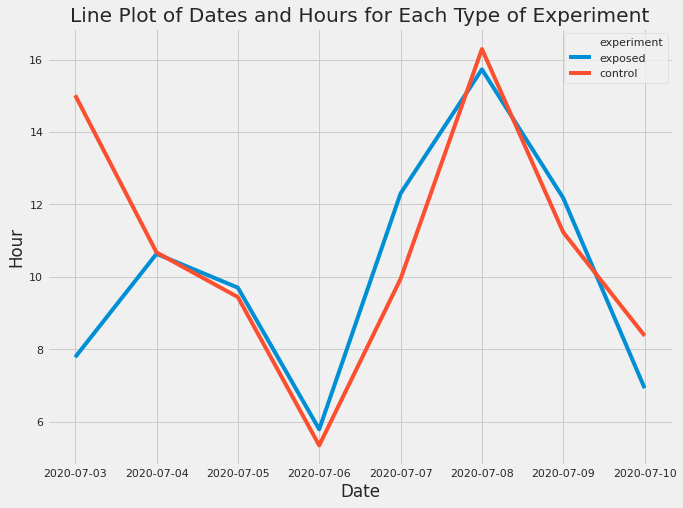

In [26]:
f, ax = plt.subplots(figsize=(10,7.5))
sns.lineplot(x="date", y="hour",data=data,hue='experiment',ci=False)
ax.set_title('Line Plot of Dates and Hours for Each Type of Experiment')
ax.set_xlabel('Date')
ax.set_ylabel('Hour')
plt.show()

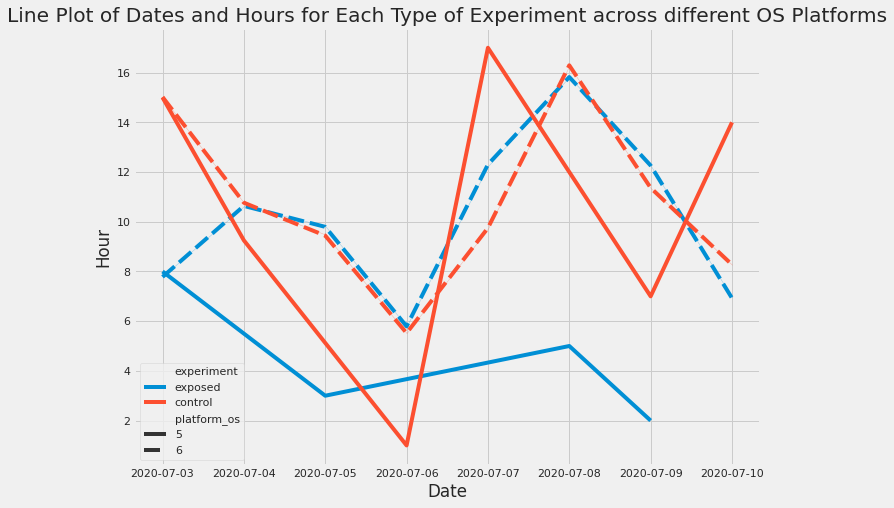

In [27]:
f, ax = plt.subplots(figsize=(10,7.5))
sns.lineplot(x="date", y="hour",data=data,hue='experiment',style='platform_os',ci=False)
ax.set_title('Line Plot of Dates and Hours for Each Type of Experiment across different OS Platforms')
ax.set_xlabel('Date')
ax.set_ylabel('Hour')
plt.show()

In [28]:
data_date = data.copy()
data_date['response'] = 1
data_date = data_date.groupby(by ='date',as_index = False).agg(sum)
data_date[['Date','time']] = data_date.date.apply(lambda x: pd.Series(str(x).split(" ")))

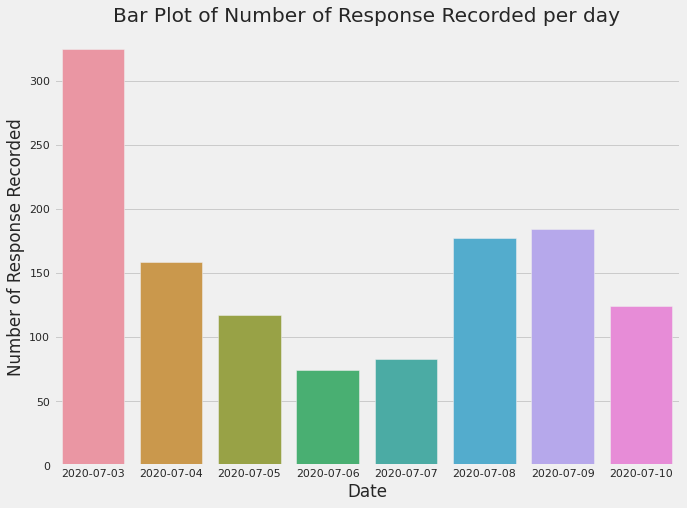

In [29]:
f, ax = plt.subplots(figsize=(10,7.5))
sns.barplot(x='Date', y="response",data=data_date,ci=False)
ax.set_title('Bar Plot of Number of Response Recorded per day')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Response Recorded')
plt.xticks(rotation=0)
plt.show()

In [30]:
corr_data = data.iloc[:,1:].corr()

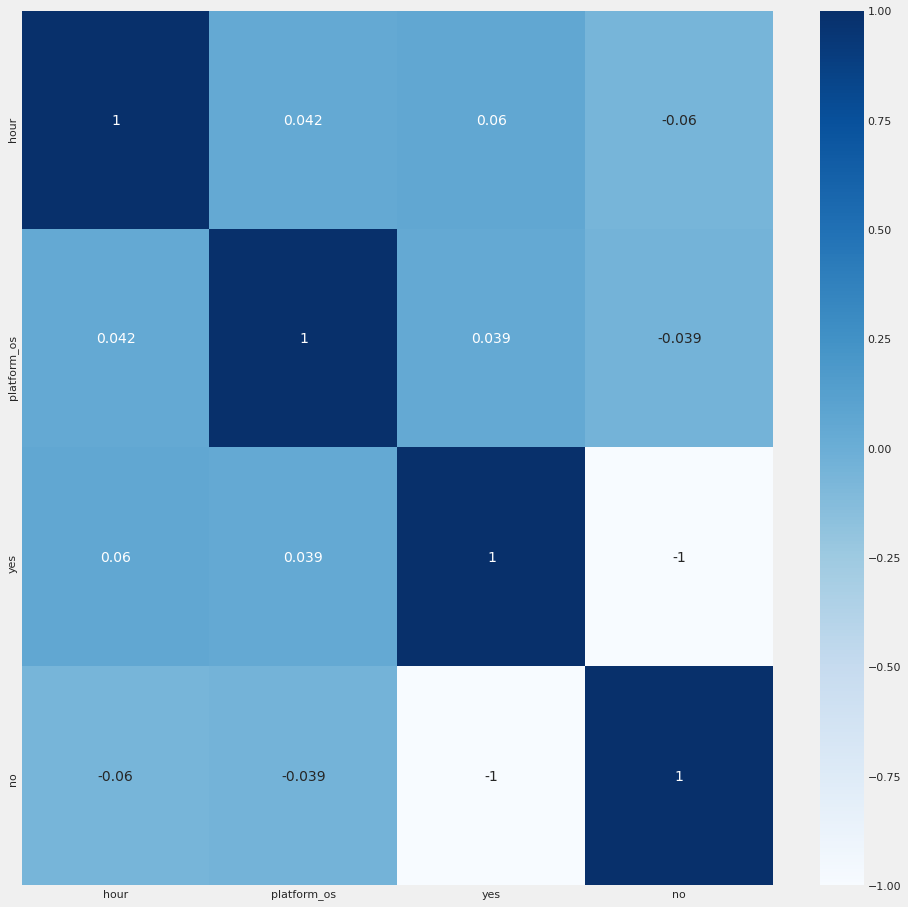

In [31]:
plt.figure(figsize=(15,15))
sns.heatmap(corr_data,cmap='Blues',annot=True) 

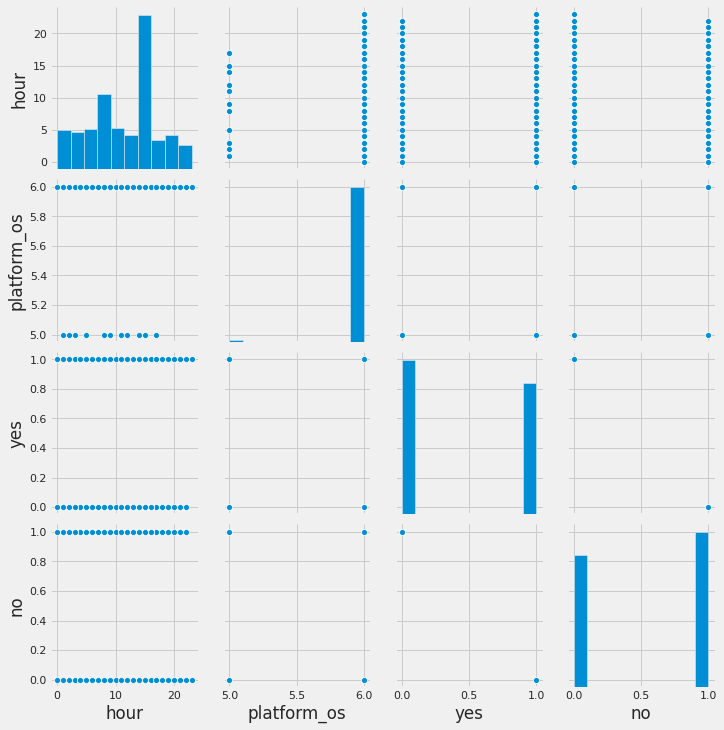

In [32]:
sns.pairplot(data=data.iloc[:,1:])
plt.show()

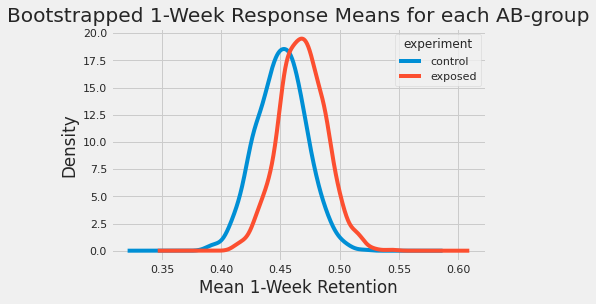

In [33]:
# Creating a list with bootstrapped means for each AB-group
boot_1w = []
iterations=1000
for i in range(iterations):
    boot_mean = data.sample(frac=1, replace=True).groupby('experiment')['yes'].mean()
    boot_1w.append(boot_mean)
    
# Transforming the list to a DataFrame
boot_1w = pd.DataFrame(boot_1w)
    
# A Kernel Density Estimate plot of the bootstrap distributions
ax = boot_1w.plot.kde()
ax.set_title('Bootstrapped 1-Week Response Means for each AB-group')
ax.set_xlabel('Mean 1-Week Retention');


## Hypothesis Testing

#### Classical P-value based Algorithm

Defining required functions before starting.



In [34]:
def get_power(n, p1, p2, cl):
    alpha = 1 - cl
    qu = stats.norm.ppf(1 - alpha/2)
    diff = abs(p2-p1)
    bp = (p1+p2) / 2
    
    v1 = p1 * (1-p1)
    v2 = p2 * (1-p2)
    bv = bp * (1-bp)
    
    power_part_one = stats.norm.cdf((n**0.5 * diff - qu * (2 * bv)**0.5) / (v1+v2) ** 0.5)
    power_part_two = 1 - stats.norm.cdf((n**0.5 * diff + qu * (2 * bv)**0.5) / (v1+v2) ** 0.5)
    
    power = power_part_one + power_part_two
    
    return (power)

In [35]:
def get_sample_size(power, p1, p2, cl, max_n=10000):
    n = 1 
    while n <= max_n:
        tmp_power = get_power(n, p1, p2, cl)

        if tmp_power >= power: 
            return n 
        else: 
            n = n + 100

    return "Increase Max N Value"

In [36]:
def get_pvalue(con_conv, test_conv, con_size, test_size):
    lift = -abs(test_conv - con_conv)
    
    scale_one = con_conv * (1 - con_conv) * (1 / con_size)
    scale_two = test_conv * (1 - test_conv) * (1 / test_size)
    scale_val = (scale_one + scale_two) ** 0.5
    
    p_value = 2 * stats.norm.cdf(lift, loc = 0, scale=scale_val)
    return p_value

In [37]:
def get_ci_bnd(test_conv, con_conv, test_size, con_size, ci):
    
    sd = ((test_conv * (1 - test_conv)) / test_size + (con_conv * (1 - con_conv)) / con_size) ** 0.5
    lift = test_conv - con_conv
    
    val = stats.norm.isf((1 - ci) / 2)
    
    lwr_bnd = lift - val * sd
    upr_bnd = lift + val * sd
    
    return((lwr_bnd, upr_bnd))

Start the classical A/B test

In [38]:
#Calculate pooled probability
mask = (data["experiment"] == "control")
conversions_control = data["yes"][mask].sum()
total_users_control = data["yes"][mask].count()

mask = (data["experiment"] == "exposed")
conversions_exposed = data["yes"][mask].sum()
total_users_exposed = data["yes"][mask].count()

total_users = total_users_control + total_users_exposed

print("Split of control users who saw  a dummy ad vs exposed users who saw  creative, an online interactive ad, with the SmartAd brand: ", 
          round(total_users_control / data["yes"].count() * 100, 2), "% ",
          round((total_users_exposed / data["yes"].count()) * 100, 2), "%")

#count number of users who yes in each experiment
print("Number of control users who said yes on a a dummy ad: ", conversions_control)
print("Percentage of control users who yes: ", round((conversions_control / total_users_control) * 100, 2), "%")

mask = (data["experiment"] == "exposed")
print("Number of exposed users who yes on a creative, an online interactive ad, with the SmartAd brand: ", conversions_exposed)
print("Percentage of exposed users who yes: ", round((conversions_exposed/ total_users_exposed) * 100, 2), "%")

Split of control users who saw  a dummy ad vs exposed users who saw  creative, an online interactive ad, with the SmartAd brand:  47.14 %  52.86 %
Number of control users who said yes on a a dummy ad:  264
Percentage of control users who yes:  45.05 %
Number of exposed users who yes on a creative, an online interactive ad, with the SmartAd brand:  308
Percentage of exposed users who yes:  46.88 %


In [39]:
# Setting test parameters
baseline_rate = conversions_control / total_users_control
# Percent Lift: 0.1
practical_significance = (1 + 0.1)
#for a 95% confidence interval
confidence_level = 0.95 

power = get_power(total_users, baseline_rate, baseline_rate * practical_significance, confidence_level)
sample_size = get_sample_size(power, baseline_rate, baseline_rate * practical_significance, confidence_level)

print("Required sample size: ", round(sample_size), " per group")

Required sample size:  1301  per group


In [40]:
#Calculate pooled probability
mask = (data["experiment"] == "control")
conversions_control = data["yes"][mask].sum()
total_users_control = data["yes"][mask].count()

mask = (data["experiment"] == "exposed")
conversions_exposed = data["yes"][mask].sum()
total_users_exposed = data["yes"][mask].count()

prob_pooled = (conversions_control + conversions_exposed) / (total_users_control + total_users_exposed)
value_of_p = get_pvalue(conversions_control, conversions_exposed, total_users_control, total_users_exposed) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


In [41]:
#Calculate pooled standard error and margin of error
se_pooled = math.sqrt(prob_pooled * (1 - prob_pooled) * (1 / total_users_control + 1 / total_users_exposed))
z_score = stats.norm.ppf(1 - confidence_level / 2)
margin_of_error = se_pooled * z_score

#Calculate the value of the estimated difference between probability of conversions in the experiment and control groups
value = (conversions_exposed / total_users_exposed) - (conversions_control / total_users_control)

#Test if we can reject the null hypothesis
lower_bound = value - margin_of_error
upper_bound = value + margin_of_error

std = ((conversions_exposed * (1 - conversions_exposed)) / total_users_exposed + (conversions_control * (1 - conversions_control)) / total_users_control) ** 0.5

#up_bound,lo_bound = get_ci_bnd(conversions_exposed, conversions_control, total_users_exposed, total_users_control, ci)

print(lower_bound)
print(upper_bound)

0.016509767562591125
0.02006147102837721


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


In [42]:
z_score, p_value = sms.proportions_ztest(np.array([conversions_exposed,conversions_control]),np.array([total_users_exposed,total_users_control]))
z_score, p_value

(0.645680181221037, 0.5184864982198968)

In [43]:
# significance of the z-score
print('Significance of the z-score:')
print(norm.cdf(z_score))

# Critical value at 95% confidence
print('Critical value at 95% confidence')
print(norm.ppf(1-(0.05/2)))


Significance of the z-score:
0.7407567508900517
Critical value at 95% confidence
1.959963984540054


The z-score does exceed the critical value which is 1.959963984540054; therefore, we fail to reject the null Hypothesis (H0).
Also, the p-value is 51.84864982198968% which is not significant.

In [44]:
if practical_significance < lower_bound:
    print("Reject null hypothesis")
else: 
    print("Do not reject the null hypothesis")
    
print("The lower bound of the confidence interval is ", round(lower_bound * 100, 2), "%")
print("The upper bound of the confidence interval is ", round(upper_bound * 100, 2), "%")


Do not reject the null hypothesis
The lower bound of the confidence interval is  1.65 %
The upper bound of the confidence interval is  2.01 %


#### Sequential A/B Testing

In [45]:
samples_c = stats.norm.rvs(size=(total_users_control, conversions_control))
samples_e = stats.norm.rvs(size=(total_users_exposed, conversions_exposed))

Control

In [46]:
alpha = 0.05
z_alpha = stats.norm.isf(alpha)

cumsums = samples_c.cumsum(axis=1)
ns = np.arange(1, conversions_control + 1)

np.any(cumsums > np.sqrt(ns) * z_alpha, axis=1).sum() / total_users_control

0.36177474402730375

In [47]:
(cumsums[:, -1] > np.sqrt(conversions_control) * z_alpha).sum() / total_users_control

0.051194539249146756

In [48]:
power = 1 - stats.norm.sf(z_alpha - 1 / np.sqrt(conversions_control))
beta = 1 - power

power

0.9433243462950854

In [49]:
a = beta / (1 - alpha)
b = (1 - beta) / alpha

a, b

(0.05965858284727849, 18.866486925901707)

In [50]:
np.log((a, b))

array([-2.81911725,  2.93738717])

In [51]:
np.any(cumsums >= ns / 2 - np.log(a), axis=1).sum() / total_users_control

0.027303754266211604

Exposed

In [52]:
alpha = 0.05
z_alpha = stats.norm.isf(alpha)

cumsums = samples_e.cumsum(axis=1)
ns = np.arange(1, conversions_exposed + 1)

np.any(cumsums > np.sqrt(ns) * z_alpha, axis=1).sum() / total_users_exposed

0.4003044140030441

In [53]:
(cumsums[:, -1] > np.sqrt(conversions_exposed) * z_alpha).sum() / total_users_exposed

0.0547945205479452

In [54]:
power = 1 - stats.norm.sf(z_alpha - 1 / np.sqrt(conversions_exposed))
beta = 1 - power

power

0.9438425083003334

In [55]:
a = beta / (1 - alpha)
b = (1 - beta) / alpha

a, b

(0.05911314915754374, 18.87685016600667)

In [56]:
np.log((a, b))

array([-2.82830189,  2.93793631])

In [57]:
np.any(cumsums >= ns / 2 - np.log(a), axis=1).sum() / total_users_exposed

0.030441400304414